In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [17]:
df =pd.read_csv('train.csv')

In [18]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [20]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [21]:
df =df.dropna()

In [22]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [23]:
df.drop('ID',axis=1,inplace =True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [25]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [26]:
var =['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
df_dummies= pd.get_dummies(df,columns=var)

In [27]:
df_dummies.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,D,False,True,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2,67,1.0,1.0,B,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,67,0.0,2.0,B,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
5,56,0.0,2.0,C,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
6,32,1.0,3.0,C,False,True,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [31]:
le =LabelEncoder()

In [32]:
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])

In [33]:
df_dummies.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,3,False,True,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2,67,1.0,1.0,1,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,67,0.0,2.0,1,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
5,56,0.0,2.0,2,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
6,32,1.0,3.0,2,False,True,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [35]:
x = df_dummies.drop(['Segmentation'],axis=1)
y=df_dummies['Segmentation']

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state =42,test_size=0.2)

In [38]:
dct = DecisionTreeClassifier()
dct.fit(X_train,Y_train)
pred= dct.predict(X_test)

In [40]:
score= accuracy_score(pred,Y_test)
score

0.45461365341335336

In [42]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,Y_train)
pred1= rf.predict(X_test)

In [44]:
score= accuracy_score(pred1,Y_test)
score

0.48012003000750186

In [46]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [47]:
X1 = df[['Age' , 'Family_Size']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


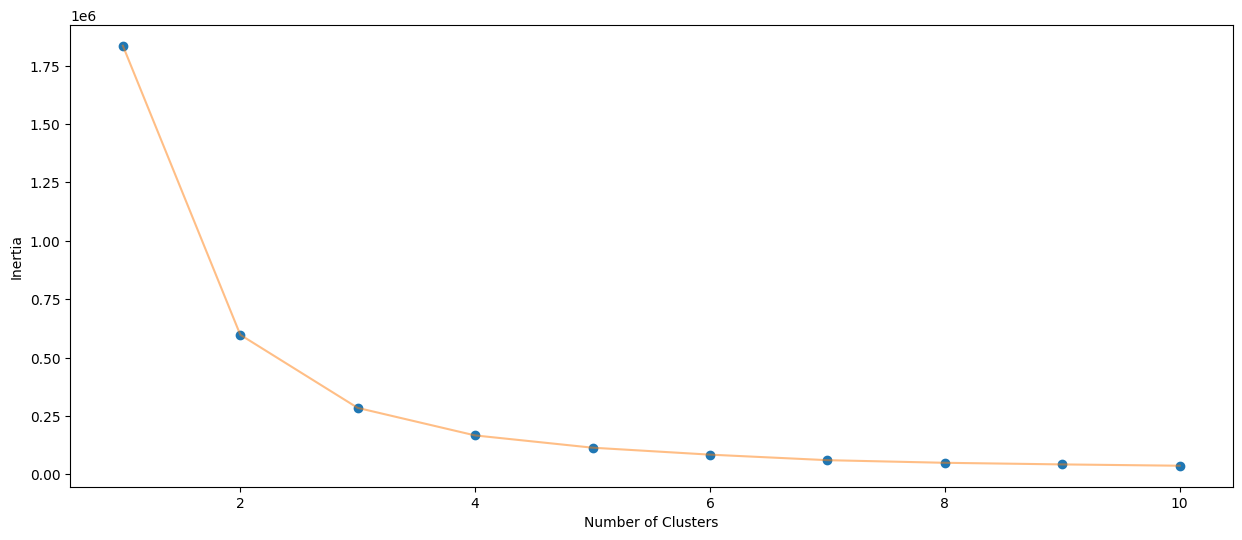

In [49]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [48]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

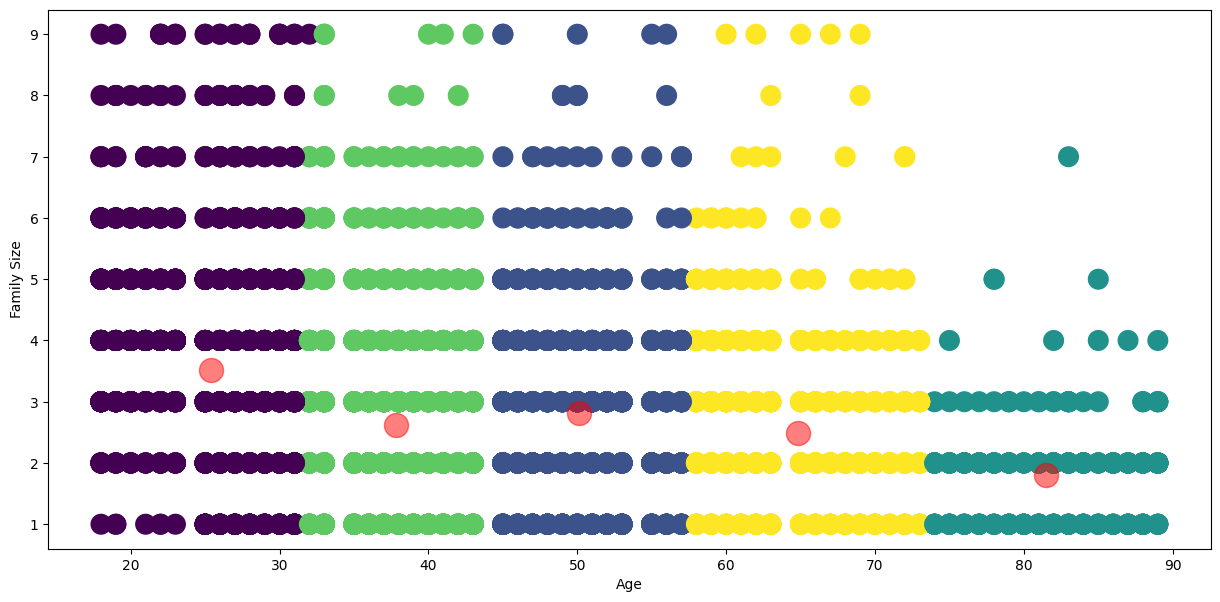

In [50]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Age' ,y = 'Family_Size' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()